In [12]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
df = pd.read_csv('data/telecom_churn.csv')

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Подглядывание в n-мерное пространство с t-SNE
http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf Немного деталей: выкинем штаты и признак оттока, бинарные Yes/No-признаки переведем в числа (pd.factorize). Также нужно масштабировать выборку – из каждого признака вычесть его среднее и поделить на стандартное отклонение, это делает StandardScaler.

In [1]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [8]:
# преобразуем все признаки в числовые, выкинув штаты
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = pd.factorize(X['International plan'])[0]
X['Voice mail plan'] = pd.factorize(X['Voice mail plan'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
%%time
tsne = TSNE(random_state=20)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 1min 7s, sys: 5.27 s, total: 1min 13s
Wall time: 1min 13s


In [36]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
import pandas as pd

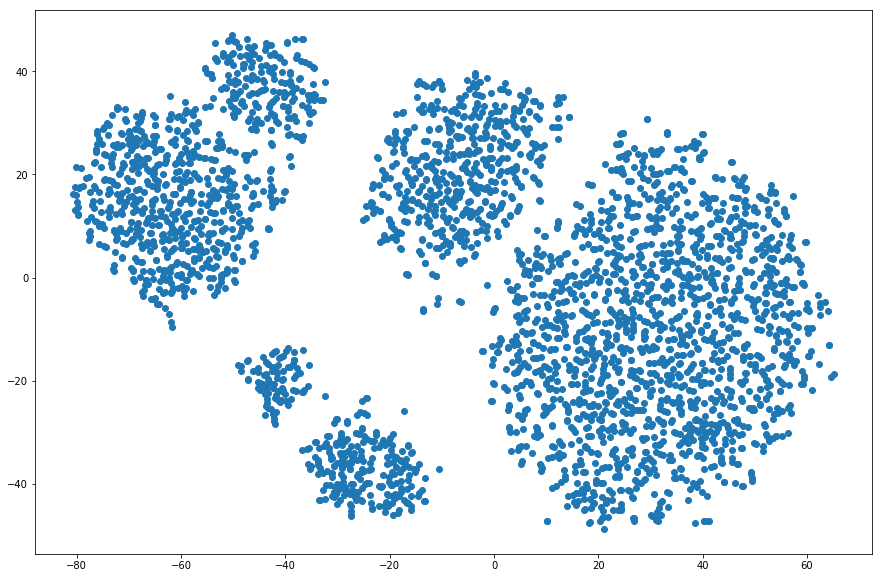

In [37]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])

#### Раскрасим полученное t-SNE представление данных по оттоку (синие – лояльные, оранжевые – ушедшие клиенты).

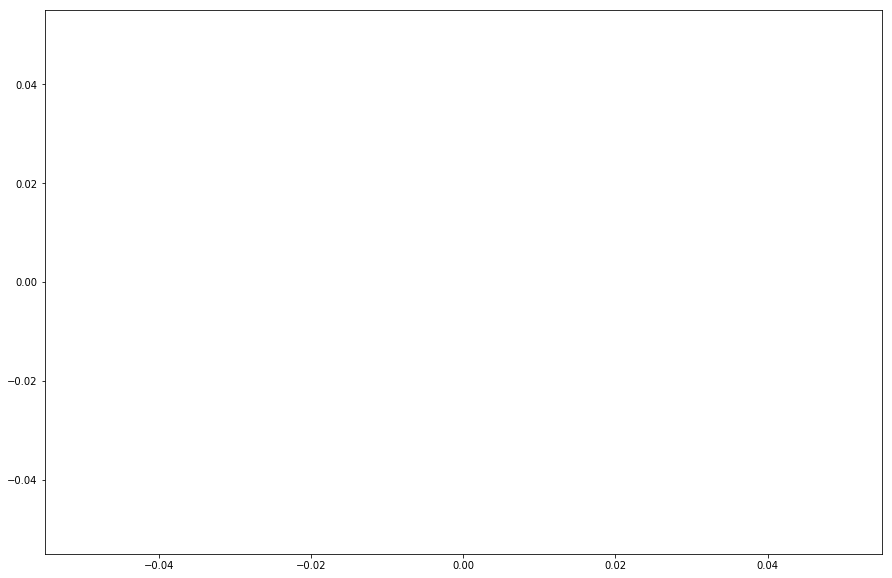

In [38]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=df['Churn'].map({0: 'blue', 1: 'orange'}))

#### Чтоб лучше понять картинку, можно также раскрасить ее по остальным бинарным признакам – по роумингу и голосовой почте. Синие участки соответствуют объектам, обладающим этим бинарным признаком.



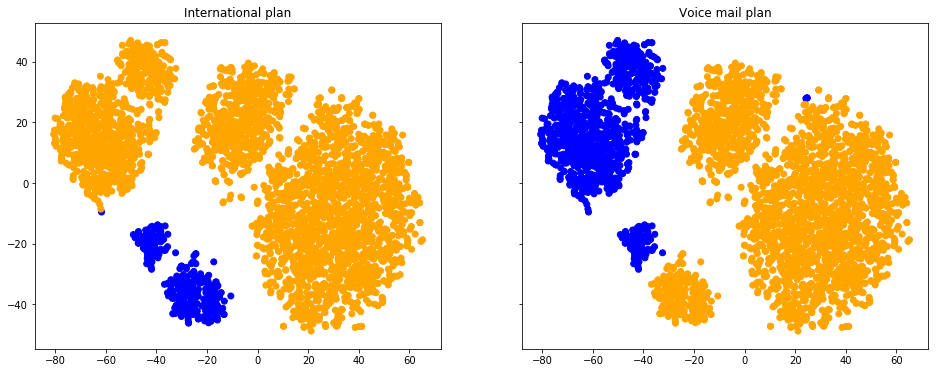

In [39]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['International plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Voice mail plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[0].set_title('International plan');
axes[1].set_title('Voice mail plan');